# Model & Feature Evaluation

_Erin Cameron_

---

In [10]:
# Import statements
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics

## 1.0) Load results from testing dataset

In [5]:
# Specify results files & location
results_path = "./results/"
prediction_files = ["RandomForest_Predictions.csv", 
                    "RandomForest_SMOTE_Predictions.csv",
                    "LogisiticRegression_Predictions.csv",
                    "NaiveBayes_Predictions.csv"
                   ]
feature_files = ["RandomForest_MDI_FeatureImportance.csv",
                 "LogisiticRegression_FeatureImportance.csv"
                ]

In [6]:
# Store results in dictionaries, one for predictions and one for feature importance (for RF and LR)
predictions = {}
for file in prediction_files:
    pred = pd.read_csv(results_path + file, index_col = 0)
    predictions[pred["Method"].unique()[0]] = pred

features = {}
for file in feature_files:
    feat = pd.read_csv(results_path + file, index_col = 0)
    features[feat["Method"].unique()[0]] = feat

## 2.0) Compare performance across classificaion algorithms

accuracy, recall, precision, ROC-AUC, confusion matrix, plotting

    Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score good for imbalanced datasets like this one, where we have way more correctly triaged patients. Average of recall for each class (aka the macro-average of recall scores per class)

    Macro vs. Micro average: https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging

    The Hamming loss is the fraction of labels that are incorrectly predicted: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss

### 2.1) Calculate evaluation metrics




************************************************************
RandomForest
************************************************************
Remember: '0' = correctly triaged, '1' = mistriaged


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,200,7,207,0.966000,0.034000
1,35,2,37,0.054054,0.945946


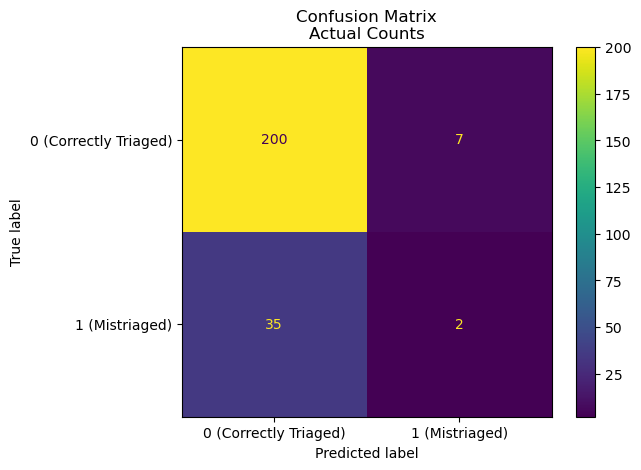

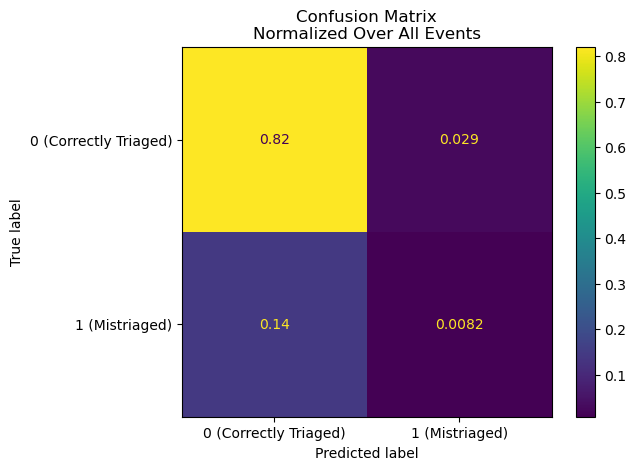


======= Performance metrics ======= 

Balanced Accuracy...0.51012
Hamming Loss...0.17213
Classification report...
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       207
           1       0.22      0.05      0.09        37

    accuracy                           0.83       244
   macro avg       0.54      0.51      0.50       244
weighted avg       0.76      0.83      0.78       244




************************************************************
LogisticRegression
************************************************************
Remember: '0' = correctly triaged, '1' = mistriaged


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,125,82,207,0.604000,0.396000
1,17,20,37,0.540541,0.459459


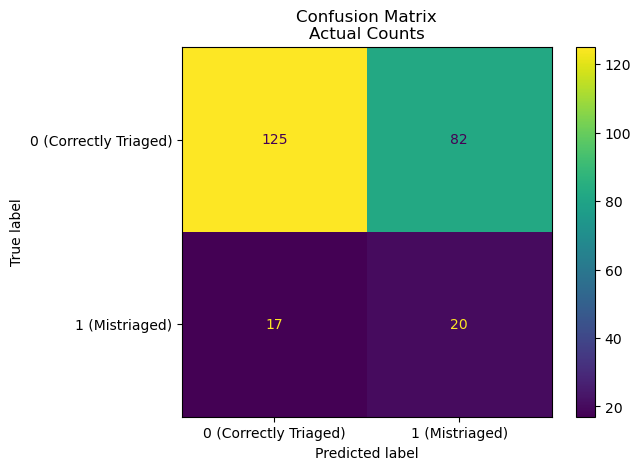

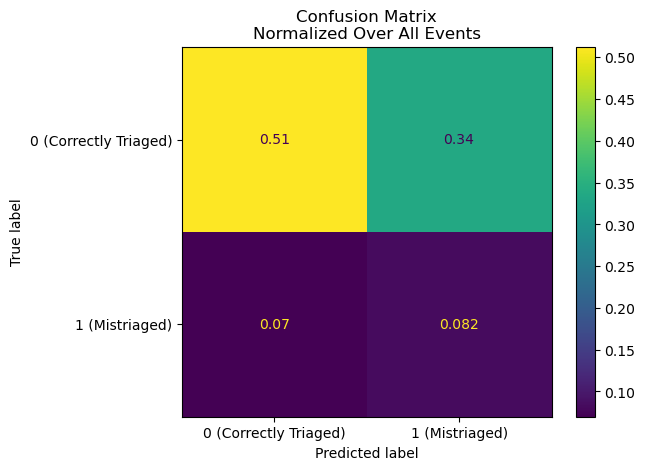


======= Performance metrics ======= 

Balanced Accuracy...0.5722
Hamming Loss...0.40574
Classification report...
              precision    recall  f1-score   support

           0       0.88      0.60      0.72       207
           1       0.20      0.54      0.29        37

    accuracy                           0.59       244
   macro avg       0.54      0.57      0.50       244
weighted avg       0.78      0.59      0.65       244




************************************************************
NaiveBayes
************************************************************
Remember: '0' = correctly triaged, '1' = mistriaged


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,136,71,207,0.657000,0.343000
1,19,18,37,0.486486,0.513514


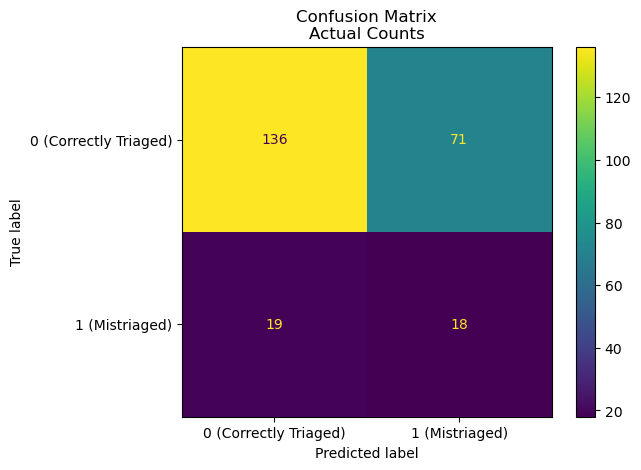

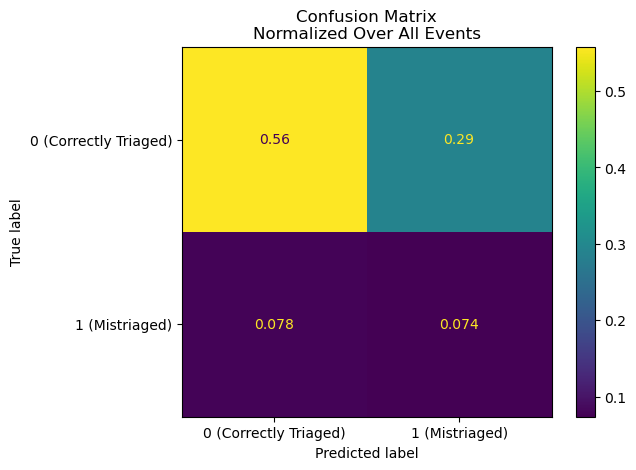


======= Performance metrics ======= 

Balanced Accuracy...0.57175
Hamming Loss...0.36885
Classification report...
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       207
           1       0.20      0.49      0.29        37

    accuracy                           0.63       244
   macro avg       0.54      0.57      0.52       244
weighted avg       0.78      0.63      0.68       244



In [11]:
# Initialize dictionaries to store confusion matrices and evaluation metrics for each method
confusion_mats = {}
eval_metrics = {}

# Loop through each prediction method in the predictions dictionary
for method in predictions:
    # Print separators and the current method name
    print("\n\n")
    print("*" * 60)
    print(method)
    print("*" * 60)
    print("Remember: '0' = correctly triaged, '1' = mistriaged")
    print("\n")

    # Extract the actual and predicted labels for the current method
    actual = predictions[method]["Actual Label"]
    predicted = predictions[method]["Predicited Label"]

    print("======= Confusion Matrix ======= \n")

    # Create a pandas confusion matrix
    cm = pd.crosstab(actual, predicted)
    # Calculate the total number of events for each actual label (row-wise sum)
    cm["Num. Events"] = cm[0] + cm[1]
    # Calculate the proportion of correctly triaged events (Predicted '0' / Total Events)
    cm["Prop. Correct"] = round(cm[0]/(cm["Num. Events"]), 3)
    # Calculate the proportion of incorrectly triaged events (Predicted '1' / Total Events)
    cm["Prop. Incorrect"] = round(cm[1]/(cm["Num. Events"]), 3)
    cm.iloc[1,3] = cm.iloc[1,1] / cm.iloc[1,2] # manual fix
    cm.iloc[1,4] = cm.iloc[1,0] / cm.iloc[1,2]
    # Store the calculated confusion matrix dataframe
    confusion_mats[method] = cm
    # Display the confusion matrix dataframe
    display(cm)

    print("\n")
    # Initialize the ConfusionMatrixDisplay object with raw counts
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted),
                                                display_labels = ["0 (Correctly Triaged)", "1 (Mistriaged)"]
                                               )
    # Plot the raw count confusion matrix
    cm_display.plot()
    plt.title("Confusion Matrix\nActual Counts")
    plt.show() 
    
    # Initialize the ConfusionMatrixDisplay object with matrix normalized over all events
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize = 'all'),
                                                display_labels = ["0 (Correctly Triaged)", "1 (Mistriaged)"]
                                               )
    # Plot the normalized confusion matrix
    cm_display.plot()
    plt.title("Confusion Matrix\nNormalized Over All Events")
    plt.show() 

    print("\n======= Performance metrics ======= \n")
    # Generate the classification report dictionary
    class_report = metrics.classification_report(actual, predicted, output_dict=True)
    class_report["balanced_accuracy"] = round(metrics.balanced_accuracy_score(actual, predicted), 5)
    class_report["hamming_loss"] = round(metrics.hamming_loss(actual, predicted), 5)
    print("Balanced Accuracy..." + str(class_report["balanced_accuracy"]))
    # Plot hamming loss (aka proportion incorrect) within each class
    print("Hamming Loss..." + str(class_report["hamming_loss"]))
    print("Classification report...")
    print(metrics.classification_report(actual, predicted))
    # Store the dictionary of evaluation metrics for the current method
    eval_metrics[method] = class_report

### 2.2) Compare evaluation metrics across methods

#### 2.2.1) Accuracy & Hamming Loss

* Accuracy is the number of predictions the model got correct
* Balanced accuracy is for class imbalanced dataset (i.e., big difference in number of labels, patients mistriaged vs. not): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html



#### Across all classes/labels

**************************************************
accuracy across all classes
**************************************************


,accuracy
RandomForest,0.827869
NaiveBayes,0.631148
LogisticRegression,0.594262


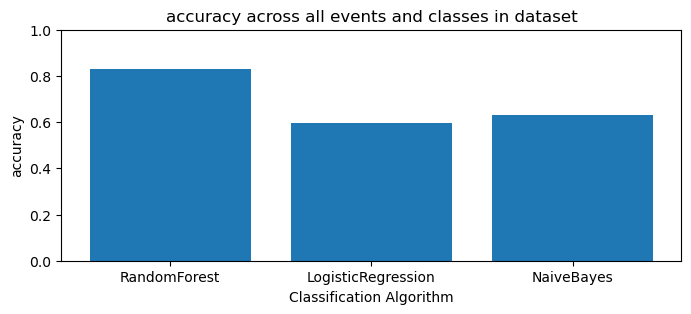

**************************************************
balanced_accuracy across all classes
**************************************************


,balanced_accuracy
LogisticRegression,0.57220
NaiveBayes,0.57175
RandomForest,0.51012


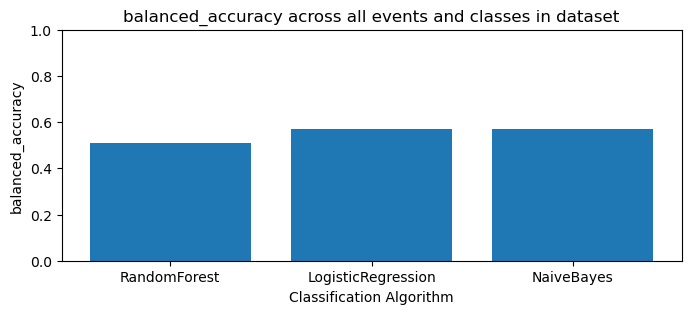

**************************************************
hamming_loss across all classes
**************************************************


,hamming_loss
LogisticRegression,0.40574
NaiveBayes,0.36885
RandomForest,0.17213


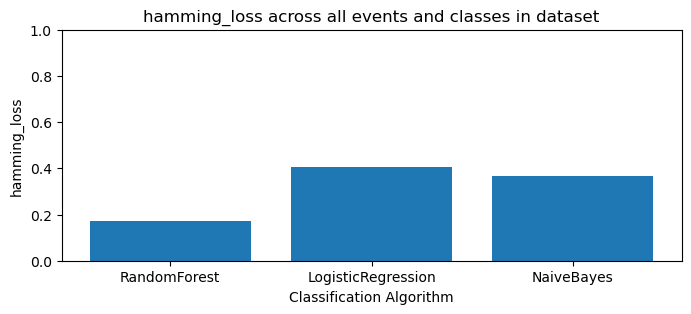

In [12]:
# Define a list of metrics to be analyzed across all classes/labels
metrics = ["accuracy", "balanced_accuracy", "hamming_loss"]

# Iterate through each metric in the list
for metric in metrics:
    # Display the current metric name
    print("*" * 50)
    print(metric + " across all classes")
    print("*" * 50)

    # Initialize an empty dictionary to hold the metric value for each method
    to_plot = {}

    # Iterate through the evaluation metrics stored for each prediction method
    for method in eval_metrics:
        # Get the current metric's value for the method and store it in to_plot
        to_plot[method] = eval_metrics[method][metric]

    # Convert the dictionary of results into a dataframe
    to_plot = pd.DataFrame(to_plot.values(), to_plot.keys(), columns = [metric])

    # Display the dataframe, sorted by the metric value in descending order for best-performing first
    display(to_plot.sort_values(metric, ascending = False))

    plt.figure(figsize = [8,3])
    # Plot a bar plot using method names as x-axis and metric values as bar height
    plt.bar(to_plot.index, to_plot[metric])
    plt.ylabel(metric)
    plt.xlabel("Classification Algorithm")
    plt.ylim(0,1)
    plt.title(metric + " across all events and classes in dataset")
    plt.show()

#### Within individual classes

**************************************************
Accuracy within individual classes
**************************************************


,RandomForest,LogisticRegression,NaiveBayes
Actual Label,,,
0,0.966000,0.604000,0.657000
1,0.054054,0.540541,0.486486


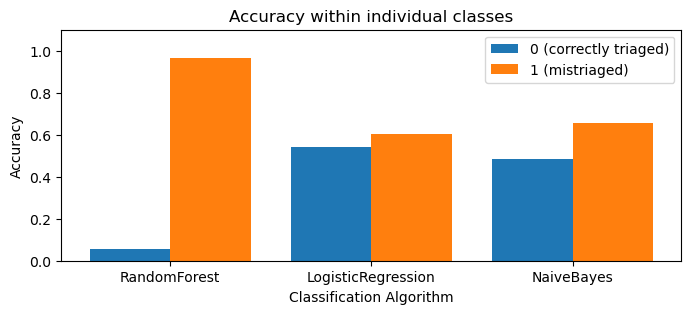

**************************************************
Hamming Loss within individual classes
**************************************************


,RandomForest,LogisticRegression,NaiveBayes
Actual Label,,,
0,0.034000,0.396000,0.343000
1,0.945946,0.459459,0.513514


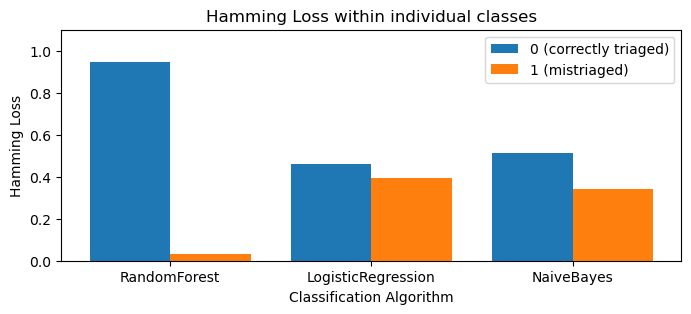

In [13]:
# Plot accuracy (number correctly labelled) & hamming loss (number incorrectly labelled) within classes (mistriaged vs not)
# Accuracy & hamming_loss across all classes/labels
metrics = ["Prop. Correct", "Prop. Incorrect"]

# Iterate through the proportional metrics
for metric in metrics:
    # Name the current metric
    if metric == "Prop. Correct":
        metric_name = "Accuracy"
    elif metric == "Prop. Incorrect":
        metric_name = "Hamming Loss"
    
    print("*" * 50)
    print(metric_name + " within individual classes")
    print("*" * 50)

    # Initialize a dictionary to hold the proportional data for plots
    to_plot = {}

    # Iterate through the stored confusion matrices for each method
    for method in confusion_mats:
        # Get the 'Prop. Correct' or 'Prop. Incorrect' column (for both rows/classes)
        to_plot[method] = confusion_mats[method][metric]
        # Convert dictionary to dataframe
        to_plot = pd.DataFrame(to_plot)

    # Display the dataframe
    display(to_plot)

    # Define plotting data
    # Create an array for the x-axis positions
    x = (np.arange(to_plot.shape[1]) + 1)
    # Get the proportion values for the "0 (correctly triaged)" class (first row)
    mistriaged_1 = to_plot.iloc[0, :]
    # Get the proportion values for the "1 (mistriaged)" class (second row)
    correctlytriaged_0 = to_plot.iloc[1, :]
    # Width of the bars for the grouped bar chart
    width = 0.40
    
    # Plot data in grouped manner of bar type
    plt.figure(figsize = [8,3])
    plt.bar(x-0.2, correctlytriaged_0, width, label = "0 (correctly triaged)")
    plt.bar(x+0.2, mistriaged_1, width, label = "1 (mistriaged)")
    plt.xticks(ticks = x, labels = to_plot.columns.to_list())
    plt.ylabel(metric_name)
    plt.xlabel("Classification Algorithm")
    plt.title(metric_name + " within individual classes")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()

#### 2.2.2) Precision, Recall & F1-Score

Accuracy can be decieving on class-imbalanced dataset like ours, where there is a significant difference between the number of positive and negative labels. Accordingly, we have to use precision and recall as additional metrics to assess preformance.
* Precision: Quantifies the number of correct positive predictions made out of positive predictions made by the model
* Macro precision: mean of precision values of individual classes
* Recall (aka sensitivity): Quantifies the number of positive predictions correctly made out of all possible positive predictions.
* Macro recall: mean of recall values of individual classes
* Weighted recall: average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall. Weighted recall is equal to accuracy.
* F1-score keeps the balance between precision and recall. It’s often used when class distribution is uneven, but it can also be defined as a statistical measure of the accuracy of an individual test.

https://neptune.ai/blog/balanced-accuracy https://developers.google.com/machine-learning/crash-course/classification/accuracy   
https://neptune.ai/blog/balanced-accuracy   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html (ctrl+F "weighted")   


#### Across all classes/labels

In [14]:
calculations = ["macro avg", "weighted avg"]
metrics = ["precision", "recall", "f1-score"]

**************************************************
macro avg
**************************************************


=====> macro avg - precision....




,precision
NaiveBayes,0.539833
LogisticRegression,0.538180
RandomForest,0.536643


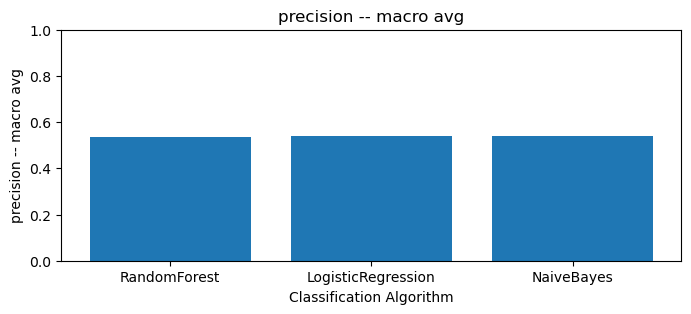



=====> macro avg - recall....




,recall
LogisticRegression,0.572203
NaiveBayes,0.571746
RandomForest,0.510119


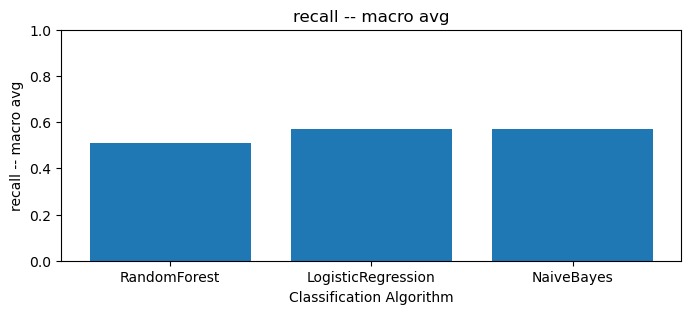



=====> macro avg - f1-score....




,f1-score
NaiveBayes,0.518548
LogisticRegression,0.502051
RandomForest,0.495967


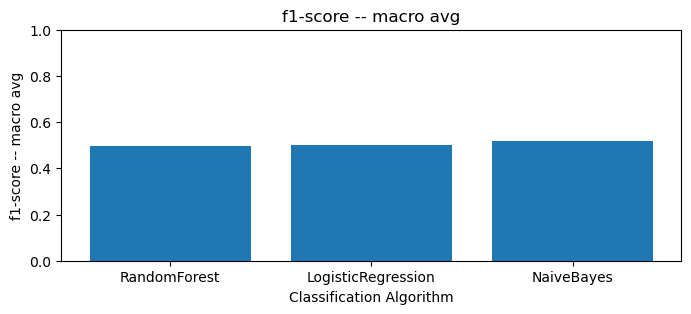

**************************************************
weighted avg
**************************************************


=====> weighted avg - precision....




,precision
LogisticRegression,0.776530
NaiveBayes,0.775037
RandomForest,0.755707


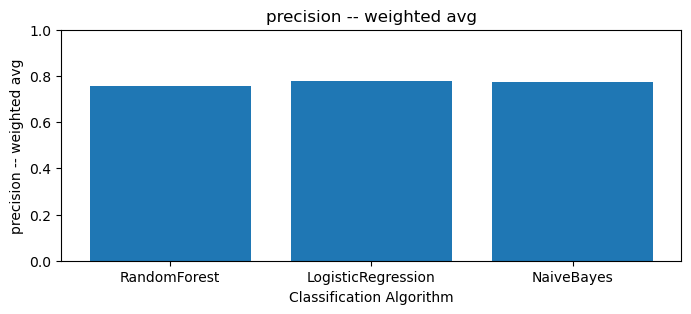



=====> weighted avg - recall....




,recall
RandomForest,0.827869
NaiveBayes,0.631148
LogisticRegression,0.594262


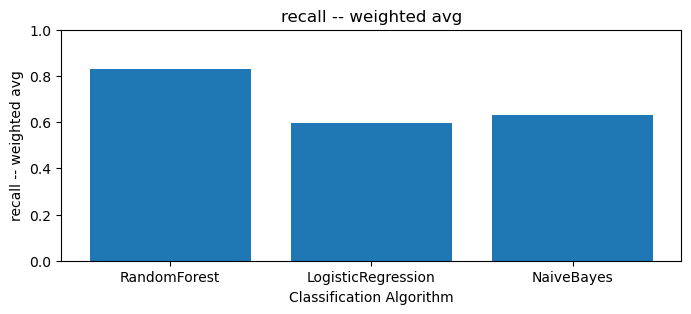



=====> weighted avg - f1-score....




,f1-score
RandomForest,0.780933
NaiveBayes,0.680768
LogisticRegression,0.651345


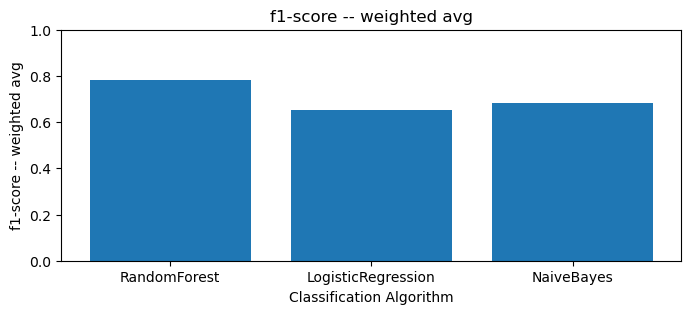

In [15]:
for calculation in calculations:
    # Display the calculation name
    print("*" * 50)
    print(calculation)
    print("*" * 50)

    # Loop through the metrics
    for metric in metrics:
        print("\n\n=====> " + calculation + " - " + metric + "....\n\n")
        # Initialize an empty dictionary to hold the metric value for each method
        to_plot = {}

        # Loop through the evaluation metrics stored for each method
        for method in eval_metrics:
            # Get the specific metric value from the specific calculation group
            to_plot[method] = eval_metrics[method][calculation][metric]

        # Convert the dictionary of results into a dataframe
        to_plot = pd.DataFrame(to_plot.values(), to_plot.keys(), columns = [metric])

        # Display the dataframe, sorted by the metric value in descenting order (best performing first)
        display(to_plot.sort_values(metric, ascending = False))

        plt.figure(figsize = [8,3])
        # Create a bar plot using the method names as x-axis and metric values as bar height
        plt.bar(to_plot.index, to_plot[metric])
        plt.ylabel(metric + " -- " + calculation)
        plt.xlabel("Classification Algorithm")
        plt.ylim(0,1)
        plt.title(metric + " -- " + calculation)
        plt.show()

#### Within each label

In [16]:
# Format a big dataframe for plotting
to_plot = {}

# Loop through each classification method
for method in eval_metrics:
    # Correctly triaged (class 0) - create dataframe for this class
    df_0 = pd.DataFrame(eval_metrics[method]["0"].values(), eval_metrics[method]["0"].keys(), columns = ["value"])
    # Add a column to identify the classification method
    df_0["Method"] = method
    # Add a column to identify the metric type
    df_0["Metric"] = df_0.index
    # Add a column to identify the class label
    df_0["Class"] = "0 (correctly triaged)"
    # Reset the index, dropping the old metric names which were used as index
    df_0 = df_0.reset_index(drop = True)

    # Mistriaged (class 1) - create dataframe for this class
    df_1 = pd.DataFrame(eval_metrics[method]["1"].values(), eval_metrics[method]["1"].keys(), columns = ["value"])
    # Add a column to identify the classification method
    df_1["Method"] = method
    # Add a column to identify the metric type
    df_1["Metric"] = df_1.index
    # Add a column to identify the class label
    df_1["Class"] = "1 (mistriaged)"
    # Reset the index
    df_1 = df_1.reset_index(drop = True)
    
    # Concatenate class dataframes together
    to_plot[method] = pd.concat([df_0, df_1], ignore_index = True)
    
# Combine across methods & display 
to_plot = pd.concat(to_plot.values(), ignore_index = True)
display(to_plot)

,value,Method,Metric,Class
0,0.851064,RandomForest,precision,0 (correctly triaged)
1,0.966184,RandomForest,recall,0 (correctly triaged)
2,0.904977,RandomForest,f1-score,0 (correctly triaged)
3,207.000000,RandomForest,support,0 (correctly triaged)
4,0.222222,RandomForest,precision,1 (mistriaged)
5,0.054054,RandomForest,recall,1 (mistriaged)
6,0.086957,RandomForest,f1-score,1 (mistriaged)
7,37.000000,RandomForest,support,1 (mistriaged)
8,0.880282,LogisticRegression,precision,0 (correctly triaged)
9,0.603865,LogisticRegression,recall,0 (correctly triaged)


<Figure size 300x600 with 0 Axes>

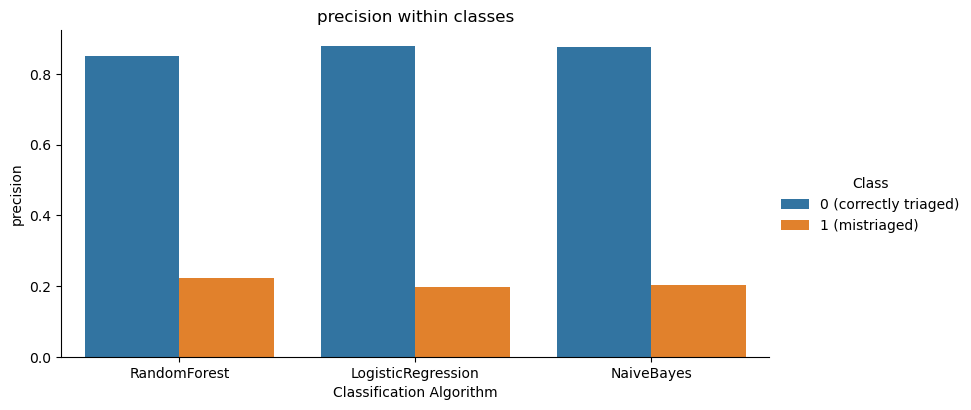

<Figure size 300x600 with 0 Axes>

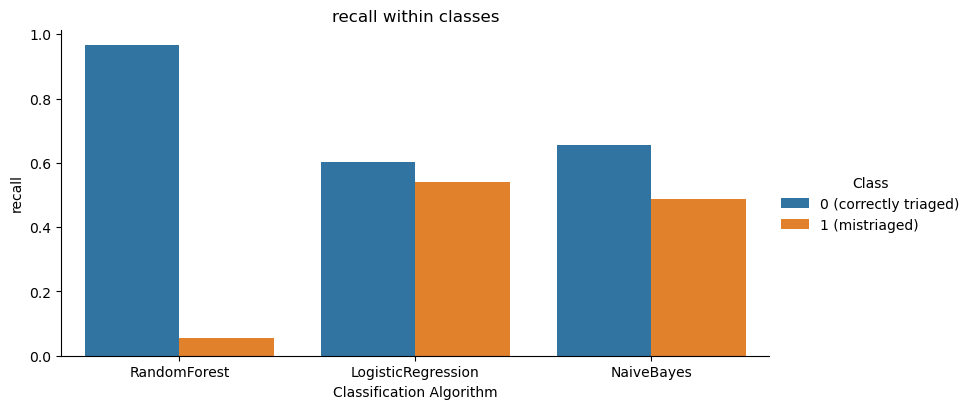

<Figure size 300x600 with 0 Axes>

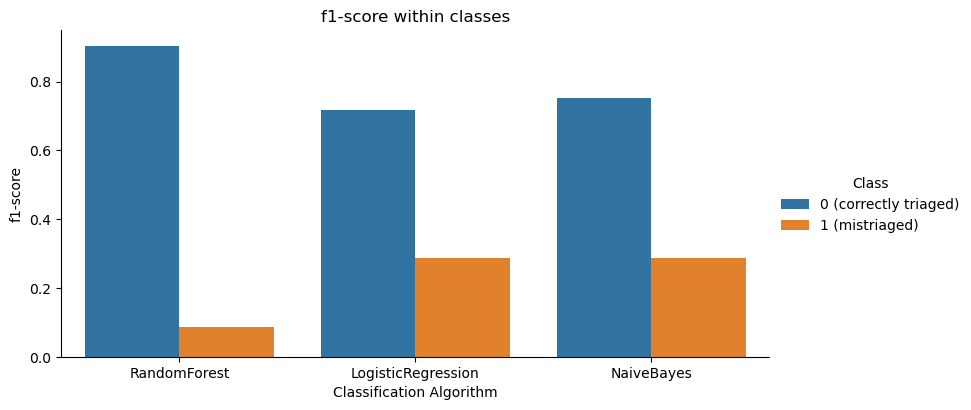

In [17]:
# Plot each of the metrics as a grouped bar plot
metrics = ["precision", "recall", "f1-score"]

# Loop through each of the defined metrics
for metric in metrics:
    # Subset the dataframe by metric
    sub = to_plot[to_plot["Metric"] == metric]

    plt.figure(figsize=(3,6))
    # Generate a grouped bar plot using seaborn catplot
    g = sns.catplot(data = sub, 
                    kind = "bar", 
                    x = "Method", 
                    y = "value", 
                    hue = "Class",
                    height = 4,
                    aspect = 2
                   )
    plt.ylabel(metric)
    plt.xlabel("Classification Algorithm")
    plt.title(metric + " within classes")
    plt.show()

### 3.0) Evaluate feature importance across algorithms

Which features are the most predicitve of mistriaging a patient? Are the same features the most important across multiple algorithms? Note, we cannot evaluate feature importance for the Naive Bayes Classifier due to the methodology -- this section focusses on logisitic regression and random forest only.
* Random Forest: feature importance measured using Mean Decrease in Impurity (MDI). Higher values = feature is more important. STd calculated from MDI of 100 trees used in model to generate consensus model tree. See here for more info https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html
* Logistic regression: feature importance calculated using Feature Coefficient. Higher values = feature is more important. Description @ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
# How many features used in each model? I expect a lot because there are binarized columns with a number of categories (e.g., Chief_complain)
print("====> RandomForest_MDI...." + str(len(features["RandomForest_MDI"]["Feature"].unique())) + " features")
print("====> LogisticRegression...." + str(len(features["LogisticRegression"]["Feature"].unique())) + " features")

====> RandomForest_MDI....29 features
====> LogisticRegression....29 features


#### Plot top and bottom features for each model

,Method,Feature Coefficient
Feature,,
DG_neurological,LogisticRegression,1.028834
DG_musculoskeletal_trauma,LogisticRegression,0.501636
DG_other_systemic,LogisticRegression,0.450066
CC_systemic_infectious,LogisticRegression,0.300306
DG_infectious,LogisticRegression,0.294953
DG_genitourinary,LogisticRegression,0.080082
KTAS duration_min,LogisticRegression,0.021079
HR,LogisticRegression,0.010926
RR,LogisticRegression,0.008099


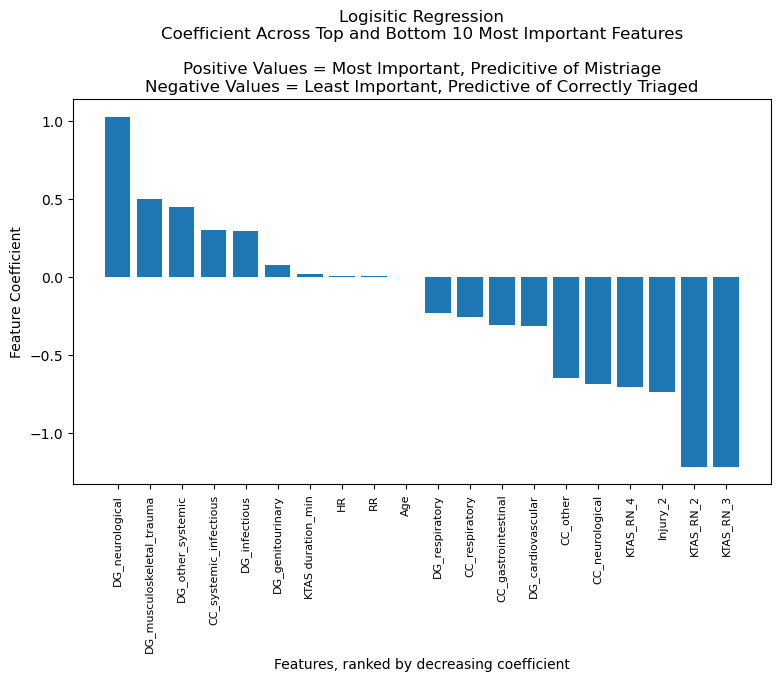

In [19]:
# Logistic regression
nfeats = 10
featCoeffs = features["LogisticRegression"].sort_values("Feature Coefficient", ascending = False)
top_N = pd.concat([featCoeffs.head(nfeats),featCoeffs.tail(nfeats)]).set_index("Feature")
display(top_N)
plt.figure(figsize = [9, 5])
plt.bar(top_N.index, top_N["Feature Coefficient"])
plt.xticks(fontsize = 8, rotation = 90)
plt.ylabel("Feature Coefficient")
plt.title("Logisitic Regression\nCoefficient Across Top and Bottom 10 Most Important Features\n\nPositive Values = Most Important, Predicitive of Mistriage\nNegative Values = Least Important, Predictive of Correctly Triaged")
plt.xlabel("Features, ranked by decreasing coefficient")
plt.show()

,Method,FeatureImportance_MDI,std
Feature,,,
Length of stay_min,RandomForest_MDI,0.121939,0.049341
HR,RandomForest_MDI,0.117165,0.046540
Age,RandomForest_MDI,0.103080,0.041140
DBP,RandomForest_MDI,0.090390,0.041658
SBP,RandomForest_MDI,0.088170,0.036220
KTAS duration_min,RandomForest_MDI,0.084918,0.039499
BT,RandomForest_MDI,0.084016,0.037797
RR,RandomForest_MDI,0.040446,0.024810
KTAS_RN_3,RandomForest_MDI,0.024685,0.021118


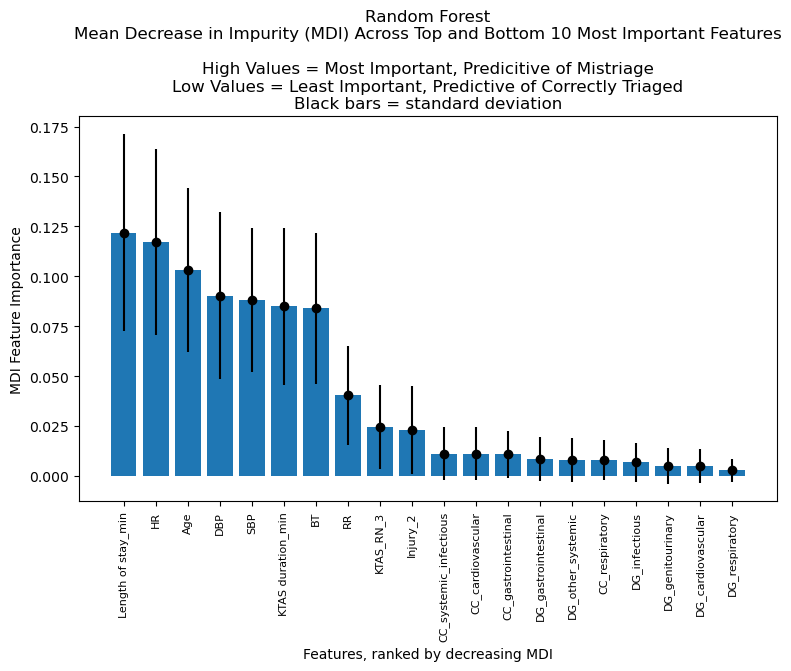

In [20]:
# Random Forest
nfeats = 10
featCoeffs = features["RandomForest_MDI"].sort_values("FeatureImportance_MDI", ascending = False)
top_N = pd.concat([featCoeffs.head(nfeats),featCoeffs.tail(nfeats)]).set_index("Feature")
display(top_N)
plt.figure(figsize = [9, 5])
plt.bar(top_N.index, top_N["FeatureImportance_MDI"])
plt.errorbar(top_N.index, top_N["FeatureImportance_MDI"], yerr=top_N["std"], fmt="o", color="black")
plt.xticks(fontsize = 8, rotation = 90)
plt.ylabel("MDI Feature Importance")
plt.title("Random Forest\nMean Decrease in Impurity (MDI) Across Top and Bottom 10 Most Important Features\n\nHigh Values = Most Important, Predicitive of Mistriage\nLow Values = Least Important, Predictive of Correctly Triaged\nBlack bars = standard deviation")
plt.xlabel("Features, ranked by decreasing MDI")
plt.show()